# Adult Census Income

Predict whether income exceeds $50K/yr based on census data

Dataset:This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics)

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
df=pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [54]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
32552,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32553,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [55]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [56]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [57]:
df.shape

(32561, 15)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [59]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [60]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Univariate Analysis

In [61]:
df['age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64

C:\Users\nagan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

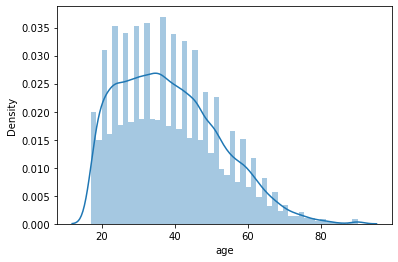

In [62]:
sns.distplot(df['age'])

In [63]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [64]:
df['workclass'].mode()

0    Private
dtype: object

In [65]:
df['workclass'].replace(['?'],['Private'],inplace=True)

In [66]:
df['workclass'].value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

C:\Users\nagan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


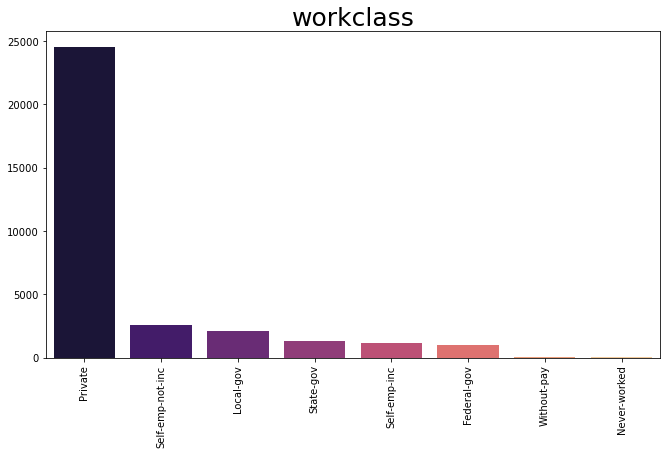

In [67]:
plt.figure(figsize = (11,6))
sns.barplot(df['workclass'].value_counts().index, df['workclass'].value_counts().values, 
            palette='magma')
plt.title('workclass',fontsize=25)
plt.xticks(rotation=90)
plt.show()

Most of them are private employees

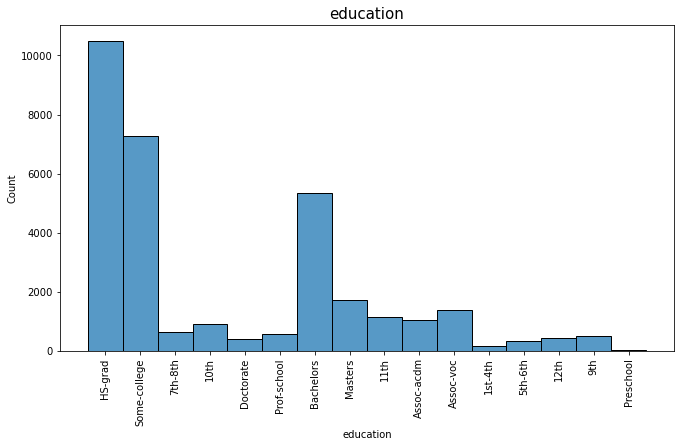

In [68]:

plt.figure(figsize = (11,6))
sns.histplot(df['education'], palette='cubehelix')
plt.title('education',fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [69]:
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

Most of the employees completed HS-grad

In [70]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [71]:
df['occupation'].mode()

0    Prof-specialty
dtype: object

In [72]:
df['occupation'].replace(['?'],['Prof-specialty'],inplace=True)

In [73]:
df['occupation'].value_counts()

Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

C:\Users\nagan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


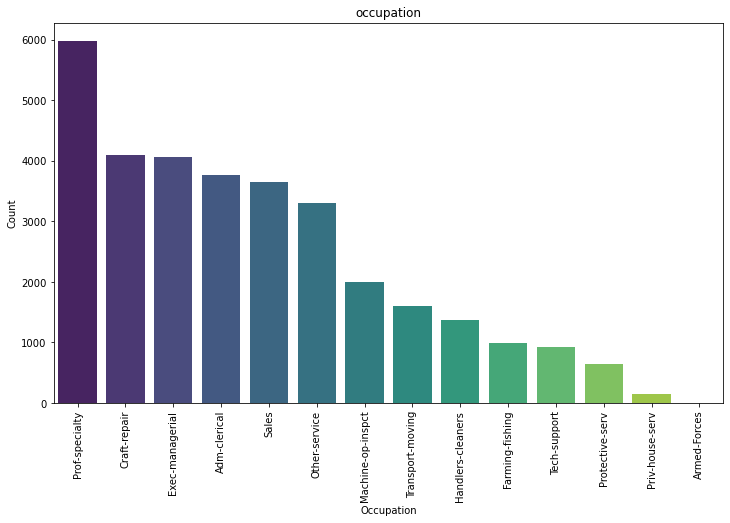

In [74]:
plt.figure(figsize=(12,7))
sns.barplot(df['occupation'].value_counts().index,df['occupation'].value_counts().values,palette='viridis')
plt.title('occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

In [75]:
df['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

<AxesSubplot:ylabel='marital.status'>

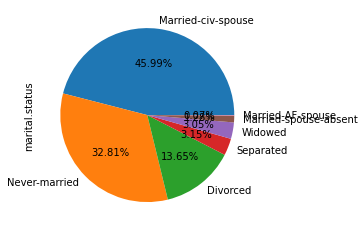

In [76]:
df['marital.status'].value_counts().plot(kind='pie',autopct="%1.2f%%")

C:\Users\nagan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Husband'),
  Text(1, 0, 'Not-in-family'),
  Text(2, 0, 'Own-child'),
  Text(3, 0, 'Unmarried'),
  Text(4, 0, 'Wife'),
  Text(5, 0, 'Other-relative')])

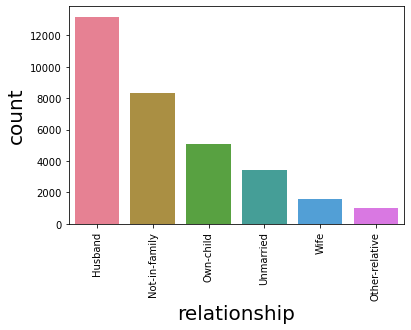

In [77]:
 
sns.barplot(df['relationship'].value_counts().index, df['relationship'].value_counts().values,palette='husl')
plt.xlabel('relationship',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.xticks(rotation=90)


C:\Users\nagan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='race', ylabel='count'>

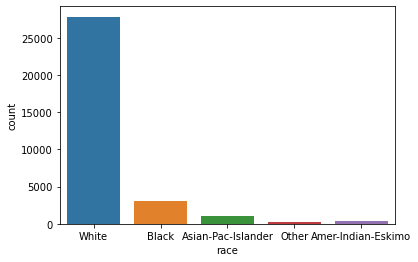

In [78]:
sns.countplot(df['race'])

In [79]:
df['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

C:\Users\nagan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

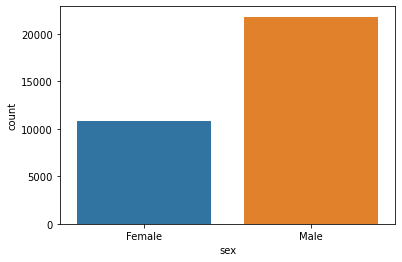

In [80]:
sns.countplot(df['sex'])

C:\Users\nagan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


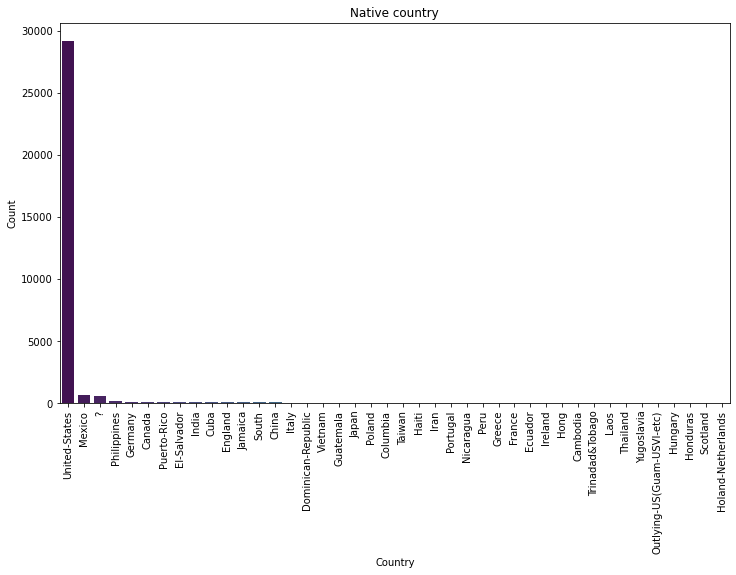

In [81]:
plt.figure(figsize=(12,7))
sns.barplot(df['native.country'].value_counts().index,df['native.country'].value_counts().values,palette='viridis')
plt.title('Native country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

In [82]:
df['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [83]:
df['native.country'].mode()

0    United-States
dtype: object

In [84]:
df['native.country'].replace(['?'],['United-States'],inplace=True)

In [85]:
df['native.country'].value_counts()

United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

C:\Users\nagan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='count'>

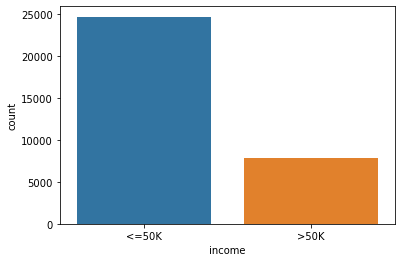

In [86]:
sns.countplot(df['income'])

# Observations

Most of the employees are 'private'

Around 32 % of employees are completed Hs-Grad

Higher number of employess from 'Prof-specialty'

45.99% are married

Most of the employees are husband because most of the men work more than women

85% of employees are white and there are very few asian, black or other.

Most of them are americans

Most of employees are men


# Bivariate analysis

<AxesSubplot:xlabel='hours.per.week', ylabel='age'>

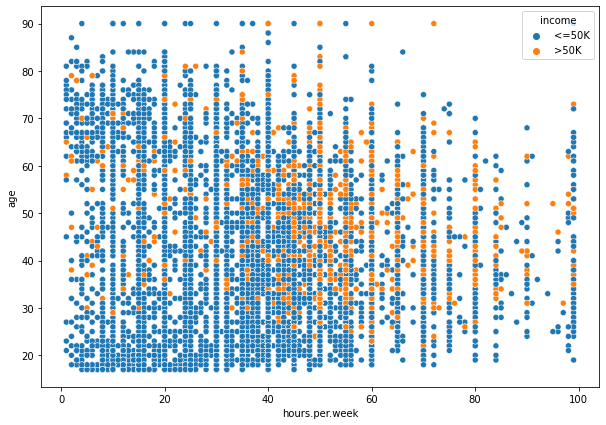

In [87]:
plt.figure(figsize = (10,7))
sns.scatterplot(x=df['hours.per.week'], y=df['age'], hue=df['income'])

Employee who are working for 40-50 hours per week the income is >50k 

<AxesSubplot:xlabel='income', ylabel='count'>

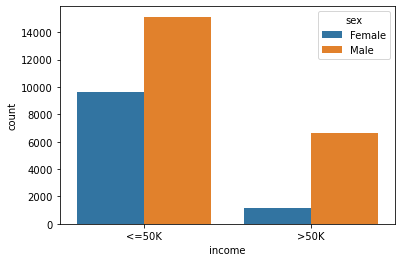

In [88]:
sns.countplot(x='income', hue='sex', data=df)

<AxesSubplot:xlabel='count', ylabel='marital.status'>

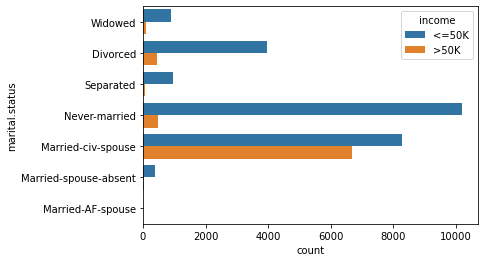

In [89]:
sns.countplot(y ='marital.status', hue = "income", data = df)

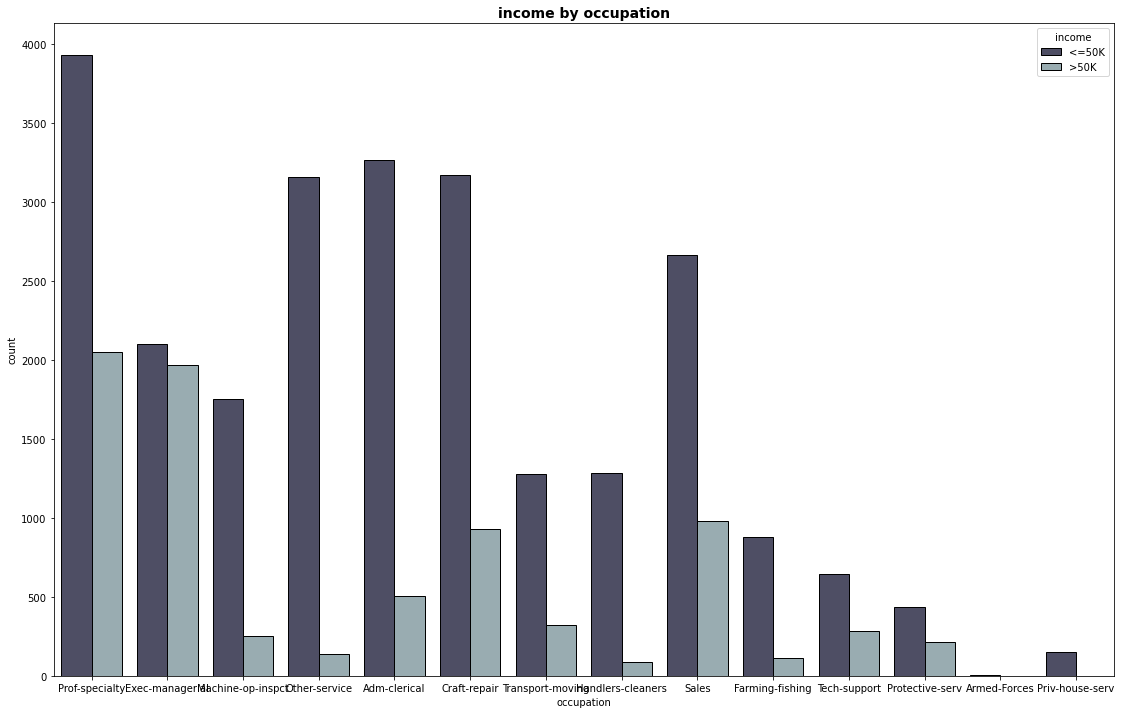

In [90]:
plt.figure(figsize = (19, 12))
plt.title("income by occupation", fontweight = "bold", fontsize = 14, 
        fontfamily = "sans-serif", color = 'black')
ax = sns.countplot(x = "occupation", data = df, hue = "income", edgecolor = "black", palette = "bone")

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

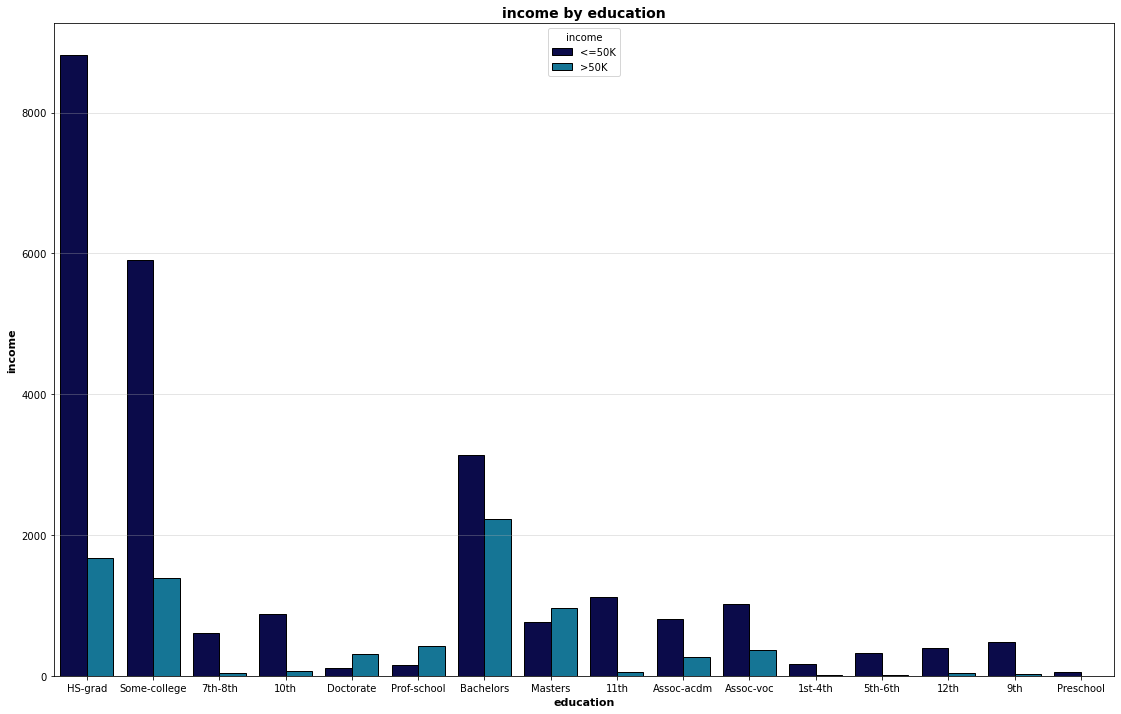

In [91]:
plt.figure(figsize = (19, 12))
plt.title("income by education", fontweight = "bold", fontsize = 14, 
        fontfamily = "sans-serif", color = 'black')
ax = sns.countplot(x = "education", data = df, hue= "income", edgecolor = "black", palette = "ocean")
plt.xlabel("education", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.ylabel("income", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.grid(axis = "y", alpha = 0.4)

df["education"].value_counts()

<AxesSubplot:xlabel='count', ylabel='race'>

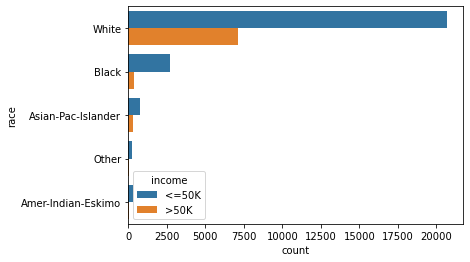

In [92]:
sns.countplot(y ='race', hue = "income", data = df)

<AxesSubplot:xlabel='count', ylabel='relationship'>

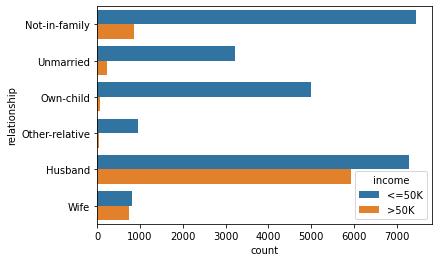

In [93]:
sns.countplot(y ='relationship', hue = "income", data = df)

# Observations

Employee who are working for 40-50 hours per week the income is >50k

Most of Females getting income <50k compared to males

Most of the Married people are getting income >50k and there are also more no of employess wwo are not marries receiving income <50k

Most of prof-speciality are receiving less than 50k

we found out from the education that bachelor's are getting >50k when compared master's

Most of the white people are getting >50k

From the relationship the husband is receiving >50k

In [94]:
df['workclass'].replace(['Private','Self-emp-not-inc','Local-gov','State-gov','Self-emp-inc','Federal-gov','Without-pay',
                       'Never-worked'],
                        [0, 1,2,3,4,5,6,7], inplace=True)

In [95]:
df['marital.status'].replace(['Married-civ-spouse','Never-married','Divorced','Separated','Widowed','Married-spouse-absent'
,'Married-AF-spouse'],
                        [0, 1,2,3,4,5,6], inplace=True)

In [96]:
df['occupation'].replace(['Prof-specialty','Craft-repair','Exec-managerial','Adm-clerical','Sales','Other-service',
                          'Machine-op-inspct','Transport-moving','Handlers-cleaners','Farming-fishing','Tech-support', 
                          'Protective-serv','Priv-house-serv','Armed-Forces'],
                        [0, 1,2,3,4,5,6,7,8,9,10,11,12,13], inplace=True)

In [126]:
df['relationship'].replace(['Husband','Not-in-family','Own-child','Unmarried','Wife','Other-relative'],
                          [0,1,2,3,4,5],inplace=True)

In [137]:
df['race'].replace(['White','Black','Asian-Pac-Islander','Amer-Indian-Eskimo','Other'],
                        [0, 1,2,3,4], inplace=True)

In [99]:
df['sex'].replace(['Male','Female'],
                        [0, 1], inplace=True)

In [101]:
df['native.country'].replace(['United-States','Mexico','Philippines','Germany','Canada','Puerto-Rico','El-Salvador','India',
                              'Cuba','England','Jamaica','South','China','Italy','Dominican-Republic','Vietnam','Guatemala',
                              'Japan','Poland','Columbia','Taiwan','Haiti','Iran','Portugal','Nicaragua','Peru','Greece','France', 
                             'Ecuador','Ireland','Hong','Cambodia','Trinadad&Tobago','Laos','Thailand','Yugoslavia','Outlying-US(Guam-USVI-etc)',
                              'Hungary','Honduras','Scotland','Holand-Netherlands'],
                            [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40],inplace=True)

In [139]:
df.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,9,4,0,1,0,1,0,4356,40,0,<=50K
1,82,0,132870,9,4,2,1,0,1,0,4356,18,0,<=50K
2,66,0,186061,10,4,0,3,1,1,0,4356,40,0,<=50K
3,54,0,140359,4,2,6,3,0,1,0,3900,40,0,<=50K
4,41,0,264663,10,3,0,2,0,1,0,3900,40,0,<=50K


In [115]:
df=df.drop(['education'],axis=1)

In [135]:
df.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,9,4,0,1,0,1,0,4356,40,0,<=50K
1,82,0,132870,9,4,2,1,0,1,0,4356,18,0,<=50K
2,66,0,186061,10,4,0,3,1,1,0,4356,40,0,<=50K
3,54,0,140359,4,2,6,3,0,1,0,3900,40,0,<=50K
4,41,0,264663,10,3,0,2,0,1,0,3900,40,0,<=50K


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  int64 
 2   fnlwgt          32561 non-null  int64 
 3   education.num   32561 non-null  int64 
 4   marital.status  32561 non-null  int64 
 5   occupation      32561 non-null  int64 
 6   relationship    32561 non-null  int64 
 7   race            32561 non-null  int64 
 8   sex             32561 non-null  int64 
 9   capital.gain    32561 non-null  int64 
 10  capital.loss    32561 non-null  int64 
 11  hours.per.week  32561 non-null  int64 
 12  native.country  32561 non-null  int64 
 13  income          32561 non-null  object
dtypes: int64(13), object(1)
memory usage: 3.5+ MB


In [141]:
df.shape

(32561, 14)

<AxesSubplot:>

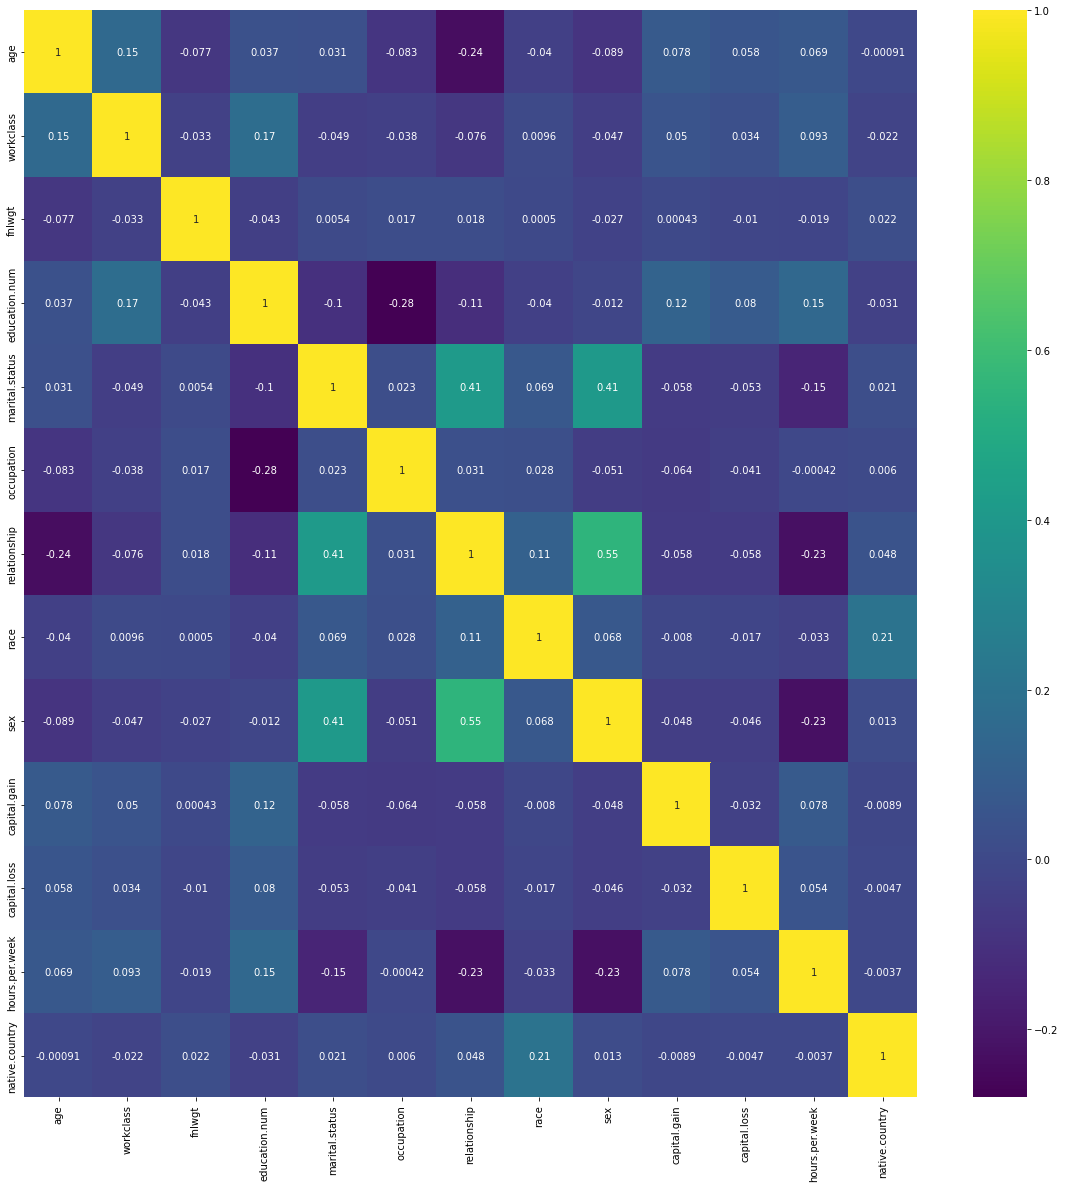

In [142]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')


# Model Building

In [143]:
x = df.drop(['income'], axis=1)
x

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,0,77053,9,4,0,1,0,1,0,4356,40,0
1,82,0,132870,9,4,2,1,0,1,0,4356,18,0
2,66,0,186061,10,4,0,3,1,1,0,4356,40,0
3,54,0,140359,4,2,6,3,0,1,0,3900,40,0
4,41,0,264663,10,3,0,2,0,1,0,3900,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,0,310152,10,1,11,1,0,0,0,0,40,0
32557,27,0,257302,12,0,10,4,0,1,0,0,38,0
32558,40,0,154374,9,0,6,0,0,0,0,0,40,0
32559,58,0,151910,9,4,3,3,0,1,0,0,40,0


In [120]:
y = df['income']
y

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557    <=50K
32558     >50K
32559    <=50K
32560    <=50K
Name: income, Length: 32561, dtype: object

In [144]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=1)

In [145]:
X_train

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
16525,48,1,247294,9,0,1,0,0,0,0,0,30,25
14551,42,0,173704,14,0,0,0,0,0,0,0,40,0
518,23,0,275818,10,1,4,1,0,1,0,1974,40,0
22524,43,0,182437,13,1,0,1,0,0,0,0,45,0
11425,45,0,180309,10,2,6,3,0,1,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32511,38,0,32916,11,0,1,0,0,0,0,0,55,0
5192,33,0,35378,13,0,4,4,0,1,0,0,45,0
12172,49,0,134797,10,2,3,1,0,0,0,0,40,0
235,65,5,23494,10,0,2,0,1,0,0,2174,40,0


In [123]:
X_test

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
9646,24,0,336088,9,2,2,1,3,1,0,0,50,0
709,34,5,190228,13,0,11,0,0,0,0,1902,48,0
7385,18,0,104704,9,1,3,2,1,0,0,0,40,0
16671,44,0,36271,13,0,1,0,0,0,0,0,40,0
21932,27,0,178709,14,1,6,1,0,1,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29663,20,0,235691,9,1,4,3,0,0,0,0,40,0
29310,47,0,70754,9,0,1,0,0,0,0,0,40,0
29661,25,0,129784,10,1,5,2,0,1,0,0,40,0
19491,28,5,281860,13,1,0,1,0,1,0,0,40,0


# DecisionTree

In [146]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [147]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [148]:
model.score(X_train,y_train)

1.0

In [149]:
y_predict=model.predict(X_test)

In [150]:
y_predict

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

In [151]:
from sklearn.metrics import accuracy_score

In [152]:
accuracy_score(y_test,y_predict)

0.8209642747466476

In [153]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_predict)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_predict)
print("Accuracy:",result2)

Confusion Matrix:
[[6493  875]
 [ 874 1527]]
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88      7368
        >50K       0.64      0.64      0.64      2401

    accuracy                           0.82      9769
   macro avg       0.76      0.76      0.76      9769
weighted avg       0.82      0.82      0.82      9769

Accuracy: 0.8209642747466476


# Logistic Regreesion

In [154]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [155]:
classifier.score(X_train,y_train)

0.7957616707616708

In [156]:
y_pred= classifier.predict(X_test)  

In [157]:
y_pred

array(['<=50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

In [158]:
accuracy_score(y_test,y_pred)

0.8010031733033064

In [159]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[7169  199]
 [1745  656]]
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.80      0.97      0.88      7368
        >50K       0.77      0.27      0.40      2401

    accuracy                           0.80      9769
   macro avg       0.79      0.62      0.64      9769
weighted avg       0.80      0.80      0.76      9769

Accuracy: 0.8010031733033064


# KNN 

In [160]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
knn_classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
knn_classifier.fit(X_train, y_train) 

KNeighborsClassifier()

In [161]:
knn_classifier.score(X_train,y_train)

0.83002808002808

In [163]:
#Predicting the test set result  
y_pred= knn_classifier.predict(X_test)  

In [164]:
y_pred

array(['<=50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

In [165]:
accuracy_score(y_test,y_pred)

0.777356945439656

In [166]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[6821  547]
 [1628  773]]
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.81      0.93      0.86      7368
        >50K       0.59      0.32      0.42      2401

    accuracy                           0.78      9769
   macro avg       0.70      0.62      0.64      9769
weighted avg       0.75      0.78      0.75      9769

Accuracy: 0.777356945439656


# SVM

In [167]:
from sklearn.svm import SVC # "Support vector classifier"  
svm_classifier = SVC(kernel='linear', random_state=0)  
svm_classifier.fit(X_train, y_train) 

SVC(kernel='linear', random_state=0)

In [168]:
svm_classifier.score(X_train,y_train)

0.797077922077922

In [169]:
#Predicting the test set result  
y_pred= svm_classifier.predict(X_test)  

In [170]:
y_pred

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

In [171]:
accuracy_score(y_test,y_pred)

0.7982393284880746

In [172]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[7031  337]
 [1634  767]]
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.88      7368
        >50K       0.69      0.32      0.44      2401

    accuracy                           0.80      9769
   macro avg       0.75      0.64      0.66      9769
weighted avg       0.78      0.80      0.77      9769

Accuracy: 0.7982393284880746


# Naive Bayes

In [173]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB  
Naive_classifier= GaussianNB()  
Naive_classifier.fit(X_train, y_train) 

GaussianNB()

In [174]:
Naive_classifier.score(X_train,y_train)

0.7944015444015444

In [175]:
# Predicting the Test set results  
y_pred = Naive_classifier.predict(X_test) 

In [176]:
y_pred

array(['<=50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype='<U5')

In [177]:
accuracy_score(y_test,y_pred)

0.7994677039615109

In [178]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[7010  358]
 [1601  800]]
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.88      7368
        >50K       0.69      0.33      0.45      2401

    accuracy                           0.80      9769
   macro avg       0.75      0.64      0.66      9769
weighted avg       0.78      0.80      0.77      9769

Accuracy: 0.7994677039615109


# Random Forest

In [179]:
from sklearn.ensemble import RandomForestClassifier

In [180]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [181]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [182]:
classifier_rf.score(X_train,y_train)

0.8527114777114777

In [183]:
y_pred = classifier.predict(X_test)

In [184]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[7169  199]
 [1745  656]]
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.80      0.97      0.88      7368
        >50K       0.77      0.27      0.40      2401

    accuracy                           0.80      9769
   macro avg       0.79      0.62      0.64      9769
weighted avg       0.80      0.80      0.76      9769

Accuracy: 0.8010031733033064


Let’s do hyperparameter tuning for Random Forest using GridSearchCV and fit the data.

In [185]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [186]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [187]:
from sklearn.model_selection import GridSearchCV

In [188]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [189]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  2.6min finished


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [190]:
grid_search.best_score_

0.862890487890488

In [191]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [192]:
classifier_rf1 = RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                                        random_state=42)

In [193]:
classifier_rf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [194]:
classifier_rf1.score(X_train,y_train)

0.893997893997894

In [196]:
y_pred1= classifier.predict(X_test)

In [197]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred1)
print("Accuracy:",result2)

Confusion Matrix:
[[7169  199]
 [1745  656]]
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.80      0.97      0.88      7368
        >50K       0.77      0.27      0.40      2401

    accuracy                           0.80      9769
   macro avg       0.79      0.62      0.64      9769
weighted avg       0.80      0.80      0.76      9769

Accuracy: 0.8010031733033064
